# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/EDA`
### Do Q1 and two other questions.

**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.   
3. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
4. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
5. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range? 
6. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.

   There is a long-tailed distribution with some donations going up to 100,000,000.
4. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?

    Gift Type
    
    * Contract         0.612097
    * Monetary Gift    0.387513
    * Real Estate      0.000390

    
5. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?

    The log "fixed" the plot by showing how the distribution is actually towards larger values when logged. Most of them are still substantially stlil high amounts, but there are some "cheaper" foreign gifts for the moentary category.
   
7. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?

[top 15 countries count](#top-15-count)

[top 15 coutries amnt](#top-15-amnt)

8. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.

[top 15 institutions](#top-15-institutions)

9. Which giftors provide the most money, in total?

[gifts](#gifts) Qatar is balling out.

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
import os 
os.listdir('data')

['airbnb_hw.csv',
 'energy.csv',
 'drilling_rigs.csv',
 'college_completion.csv',
 'tech_stocks.csv',
 'ForeignGifts_edu.csv']

In [78]:
import pandas as pd 

gifts_df = pd.read_csv("data/ForeignGifts_edu.csv")
gifts_df.head(5)

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,102000,Jacksonville State University,Jacksonville,AL,43738,250000,Monetary Gift,CHINA,NaN
1,2,104700,Troy University,Troy,AL,43592,463657,Contract,CHINA,Confucius Institute Headquarters
2,3,105100,University of Alabama,Tuscaloosa,AL,43466,3649107,Contract,ENGLAND,Springer Nature Customer Service Ce
3,4,105100,University of Alabama,Tuscaloosa,AL,43472,1000,Contract,SAUDI ARABIA,Saudi Arabia Education Mission
4,5,105100,University of Alabama,Tuscaloosa,AL,43479,49476,Contract,SAUDI ARABIA,Saudi Arabia Education Mission


In [79]:
gifts_df.columns

Index(['ID', 'OPEID', 'Institution Name', 'City', 'State',
       'Foreign Gift Received Date', 'Foreign Gift Amount', 'Gift Type',
       'Country of Giftor', 'Giftor Name'],
      dtype='object')

### top 15 count

In [80]:
gifts_df["Country of Giftor"].value_counts()[:15]

Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
Name: count, dtype: int64

### top 15 amnt

In [81]:
gifts_df.groupby("Country of Giftor").sum().sort_values(by="Foreign Gift Amount", ascending=False).index[:15]

Index(['QATAR', 'ENGLAND', 'CHINA', 'SAUDI ARABIA', 'BERMUDA', 'CANADA',
       'HONG KONG', 'JAPAN', 'SWITZERLAND', 'INDIA', 'GERMANY',
       'UNITED ARAB EMIRATES', 'FRANCE', 'SINGAPORE', 'AUSTRALIA'],
      dtype='object', name='Country of Giftor')

### top 15 institutions

In [82]:
gifts_df.groupby("Institution Name").sum().sort_values(by="Foreign Gift Amount", ascending=False).index[:15]

Index(['Carnegie Mellon University', 'Cornell University',
       'Harvard University', 'Massachusetts Institute of Technology',
       'Yale University', 'Texas A&M University', 'Johns Hopkins University',
       'Northwestern University', 'Georgetown University',
       'University of Chicago (The)', 'University of Colorado Boulder',
       'Duke University', 'Brigham Young University', 'Stanford University',
       'University of Texas MD Anderson Cancer Center'],
      dtype='object', name='Institution Name')

<Axes: >

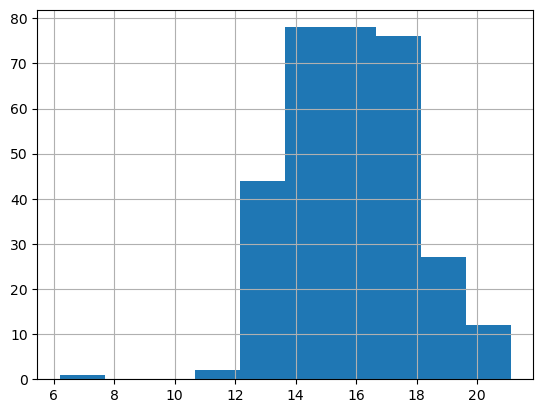

In [83]:
np.log(gifts_df.groupby("Institution Name").sum()["Foreign Gift Amount"]).hist()

### gifts

In [84]:
gifts_df.groupby("Giftor Name").sum().sort_values(by="Foreign Gift Amount", ascending=False)

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor
Giftor Name,,,,,,,,,
Qatar Foundation,6230548,89110300,Georgetown UniversityGeorgetown UniversityGeor...,WashingtonWashingtonWashingtonWashingtonWashin...,DCDCDCDCDCDCDCDCDCDCDCGAILILILILILILILILILILIL...,11199907,1166503744,ContractContractContractContractContractContra...,QATARQATARQATARQATARQATARQATARQATARQATARQATARQ...
Qatar Foundation/Qatar National Res,196298,2711000,Cornell UniversityCornell UniversityCornell Un...,IthacaIthacaIthacaIthacaIthacaIthacaIthacaItha...,NYNYNYNYNYNYNYNYNYNY,425002,796197000,ContractContractContractContractContractContra...,QATARQATARQATARQATARQATARQATARQATARQATARQATARQ...
Qatar Foundation for Education,138404,1942000,Oregon State UniversityCarnegie Mellon Univers...,CorvallisPittsburghPittsburghPittsburghPittsbu...,ORPAPAPAPAPA,257508,373945215,ContractContractContractContractContractContract,QATARQATARQATARQATARQATARQATAR
Anonymous,5698993,79905200,Chapman UniversityAmerican University (The)Bos...,OrangeWashingtonBostonNew YorkNew YorkNew York...,CADCMANYNYNYNYNYNYNYNYNYNYNYNYNYNYNYNYNYNYNYNY...,11294891,338793629,Monetary GiftMonetary GiftMonetary GiftContrac...,GERMANYENGLANDENGLANDTURKEYUNITED ARAB EMIRATE...
Saudi Arabian Cultural Mission,7422014,136674400,University of Alabama at BirminghamUniversity ...,BirminghamBirminghamBirminghamBirminghamBirmin...,ALALALALALALALALALALALALALALALALALALALALALALAL...,20713305,275221475,ContractContractContractContractContractContra...,SAUDI ARABIASAUDI ARABIASAUDI ARABIASAUDI ARAB...
...,...,...,...,...,...,...,...,...,...
"Noh, Jongyoun",8408,131500,"University of California, Los Angeles",Los Angeles,CA,43432,1,Monetary Gift,SOUTH KOREA
"Zhang, Stephanie",8749,131500,"University of California, Los Angeles",Los Angeles,CA,43579,1,Monetary Gift,CANADA
"VISETSUTH, PEERANUT",5935,131500,"University of California, Los Angeles",Los Angeles,CA,42235,1,Monetary Gift,CANADA


In [85]:
gifts_df.describe()


,ID,OPEID,Foreign Gift Received Date,Foreign Gift Amount
count,28221.00000,2.822100e+04,28221.000000,2.822100e+04
mean,14111.00000,2.487055e+05,42875.689061,5.882327e+05
std,8146.84531,3.009704e+05,641.917904,3.222011e+06
min,1.00000,1.020000e+05,41640.000000,-5.377700e+05
25%,7056.00000,1.315000e+05,42336.000000,5.700000e+03
50%,14111.00000,2.077000e+05,42934.000000,9.461500e+04
75%,21166.00000,2.974000e+05,43466.000000,3.761420e+05
max,28221.00000,4.279700e+06,44012.000000,1.000000e+08


<Axes: >

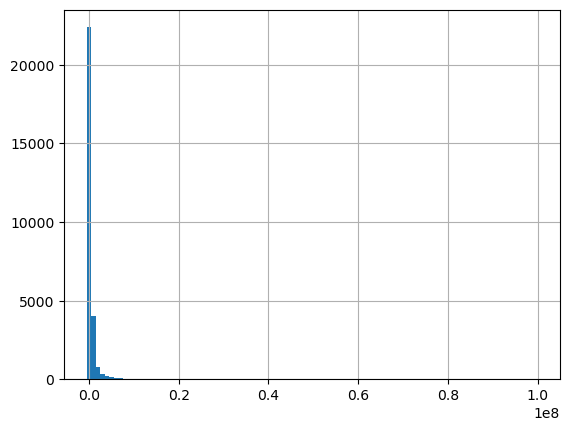

In [86]:
gifts_df["Foreign Gift Amount"].hist(bins=100)

In [87]:
gifts_df["Gift Type"].value_counts(normalize=True)

Gift Type
Contract         0.612097
Monetary Gift    0.387513
Real Estate      0.000390
Name: proportion, dtype: float64

<Axes: xlabel='Foreign Gift Amount', ylabel='Density'>

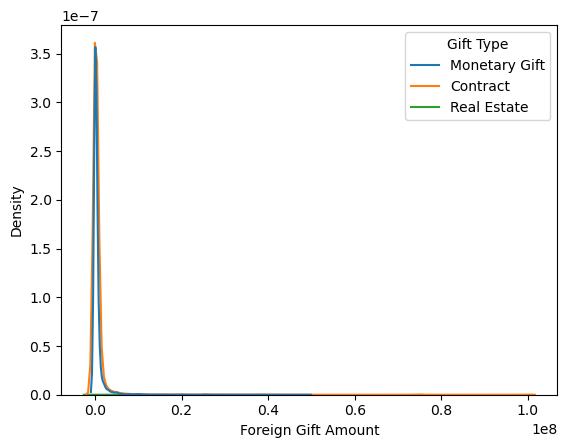

In [88]:
sns.kdeplot(data=gifts_df, x=gifts_df["Foreign Gift Amount"], hue=gifts_df["Gift Type"])

In [89]:
import numpy as np

/usr/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='Foreign Gift Amount', ylabel='Density'>

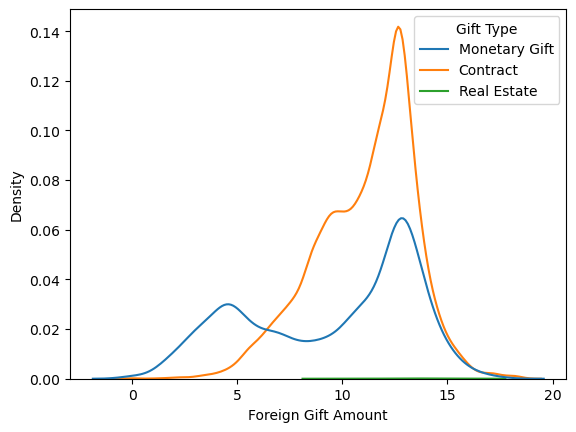

In [90]:
sns.kdeplot(data=gifts_df, x=np.log(gifts_df["Foreign Gift Amount"]), hue=gifts_df["Gift Type"])

**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
    [dimension](#dimensions)

  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property? [crosstab](#crosstab)

    I am seeing a lot of apartments than anything which makes sense. Apartments and houses and bed/breakfasts are the majority of the proprty types that usually do private rooms. There really aren't any airbnbs that you rent the entire house for.
    
  5. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.[price](#price)

    There doesn't seem like there are that many outliers or its weirdly scalled, but logging would definitely help the tails.

  6. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.[beds](#beds)

    The more beds the higher the price, but there is a std because sometimes those are single rents.
    
  8. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why? [price](#price)

I feel like the median seems a more reliable estimate here, just because of how variable and multifactored airbnb pricing on. Heuristically a dorm should cost less than a lighthouse, and the median marks off that heuristic.
     
  9. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

In [108]:
airbnb_df = pd.read_csv("data/airbnb_hw.csv")
print(airbnb_df.columns)


Index(['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating'],
      dtype='object')


In [116]:
airbnb_df.head(1)

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating,logprice
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145.0,NaN,4.976734


### hex

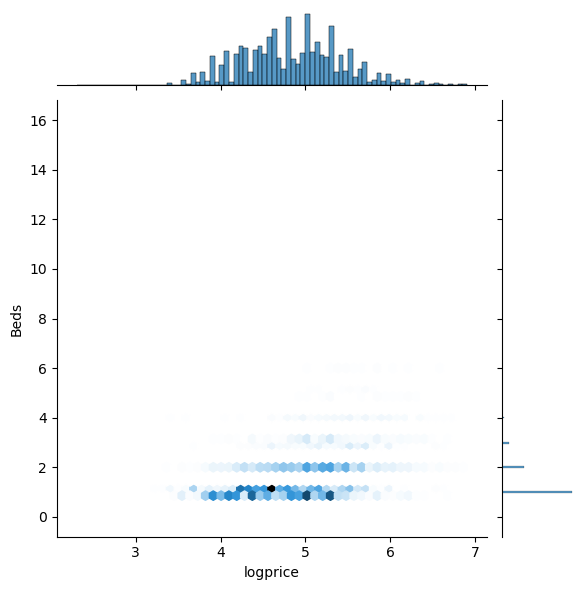

In [138]:
sns.jointplot(x=airbnb_df["logprice"], y=airbnb_df["Beds"], kind='hex')

### types

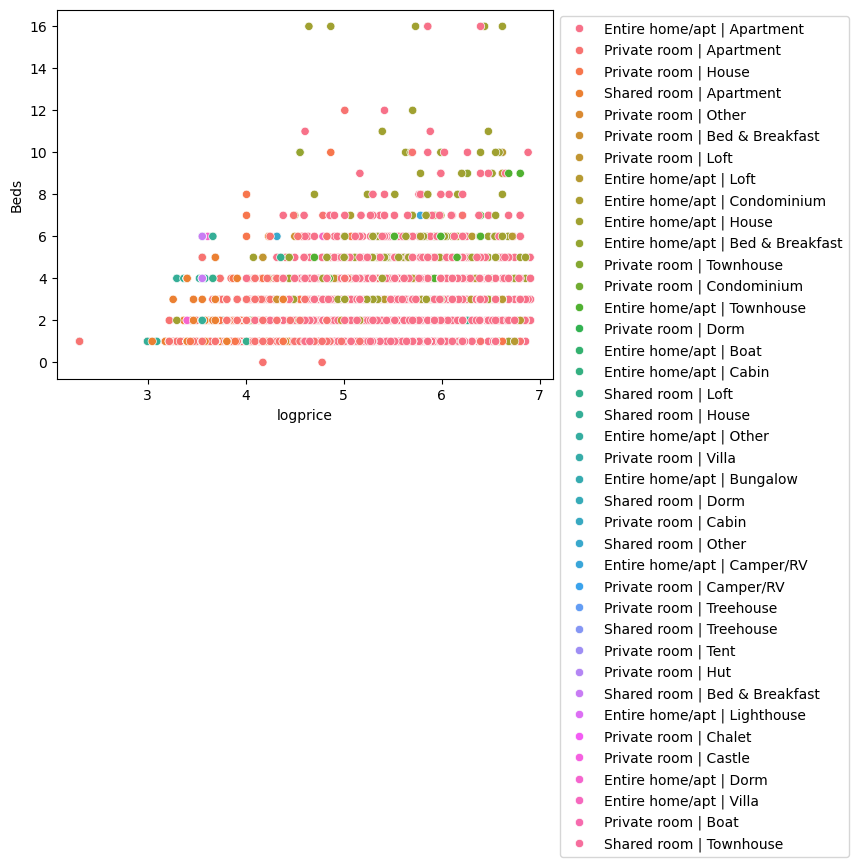

In [127]:
airbnb_df['Room_Property_Type'] = airbnb_df['Room Type'] + " | " + airbnb_df['Property Type']
sns.scatterplot(x=airbnb_df["logprice"], y=airbnb_df["Beds"], hue=airbnb_df['Room_Property_Type'] )
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

In [134]:
airbnb_df.groupby('Room_Property_Type')["Price"].mean().sort_values(ascending=False)

Room_Property_Type
Entire home/apt | Other              290.800000
Entire home/apt | Loft               284.910290
Entire home/apt | Condominium        281.126761
Entire home/apt | Cabin              250.000000
Entire home/apt | Townhouse          242.037037
Entire home/apt | House              234.554633
Entire home/apt | Villa              206.333333
Entire home/apt | Apartment          200.210161
Entire home/apt | Bed & Breakfast    184.538462
Private room | Other                 176.642857
Shared room | Treehouse              167.666667
Entire home/apt | Boat               158.428571
Entire home/apt | Bungalow           150.750000
Private room | Castle                150.000000
Shared room | Other                  148.750000
Shared room | Bed & Breakfast        143.666667
Private room | Tent                  126.250000
Private room | Villa                 126.250000
Private room | Boat                  120.000000
Entire home/apt | Camper/RV          114.333333
Private room | Loft  

In [136]:
airbnb_df.groupby('Room_Property_Type')["Price"].median().sort_values(ascending=False)

Room_Property_Type
Entire home/apt | Cabin              250.0
Entire home/apt | Loft               220.0
Entire home/apt | Condominium        200.0
Entire home/apt | Villa              200.0
Entire home/apt | Townhouse          189.0
Entire home/apt | House              188.0
Entire home/apt | Other              177.5
Entire home/apt | Apartment          175.0
Entire home/apt | Bungalow           160.5
Entire home/apt | Boat               150.0
Private room | Castle                150.0
Entire home/apt | Bed & Breakfast    130.0
Private room | Villa                 125.0
Private room | Boat                  120.0
Private room | Other                 114.0
Shared room | Treehouse              108.0
Private room | Tent                  107.5
Private room | Chalet                 99.0
Private room | Treehouse              95.0
Shared room | Townhouse               95.0
Private room | Condominium            90.0
Shared room | Other                   87.5
Private room | Bed & Breakfast     

In [135]:
airbnb_df.groupby('Room_Property_Type')["Price"].std().sort_values(ascending=False)

Room_Property_Type
Entire home/apt | Other              273.526273
Shared room | Bed & Breakfast        245.328104
Entire home/apt | Loft               184.515517
Entire home/apt | Condominium        175.313998
Entire home/apt | Townhouse          166.755243
Entire home/apt | House              159.785974
Private room | Other                 141.484252
Shared room | Other                  134.806961
Entire home/apt | Bed & Breakfast    119.814172
Shared room | Treehouse              114.788211
Entire home/apt | Apartment          109.967435
Entire home/apt | Camper/RV          107.685963
Private room | Tent                   94.989034
Entire home/apt | Villa               89.667906
Shared room | Loft                    87.521824
Private room | Villa                  71.107313
Private room | Loft                   63.875489
Shared room | Apartment               57.875888
Entire home/apt | Boat                51.110524
Private room | House                  49.402650
Private room | Bed & 

### beds

<Axes: xlabel='logprice', ylabel='Beds'>

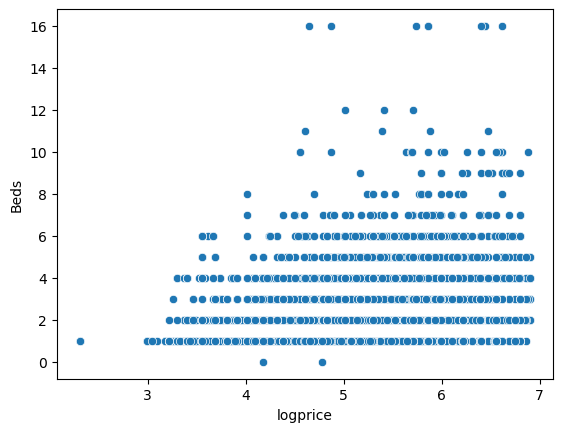

In [117]:
airbnb_df['Price'] = pd.to_numeric(airbnb_df['Price'], errors='coerce')
airbnb_df["logprice"] = np.log(airbnb_df["Price"])

sns.scatterplot(x=airbnb_df["logprice"], y=airbnb_df["Beds"])

In [121]:
airbnb_df.groupby("Beds")["logprice"].mean()

Beds
0.0     4.476755
1.0     4.682084
2.0     5.077679
3.0     5.297638
4.0     5.438240
5.0     5.596976
6.0     5.538625
7.0     5.617009
8.0     5.674340
9.0     6.297723
10.0    5.878112
11.0    5.589773
12.0    5.376839
16.0    5.801986
Name: logprice, dtype: float64

In [122]:
airbnb_df.groupby("Beds")["logprice"].std()

Beds
0.0     0.427613
1.0     0.527569
2.0     0.546961
3.0     0.572851
4.0     0.666451
5.0     0.624868
6.0     0.712393
7.0     0.693481
8.0     0.579810
9.0     0.444839
10.0    0.737968
11.0    0.791877
12.0    0.348237
16.0    0.722260
Name: logprice, dtype: float64

### price

In [105]:
airbnb_df['Price'] = pd.to_numeric(airbnb_df['Price'], errors='coerce')

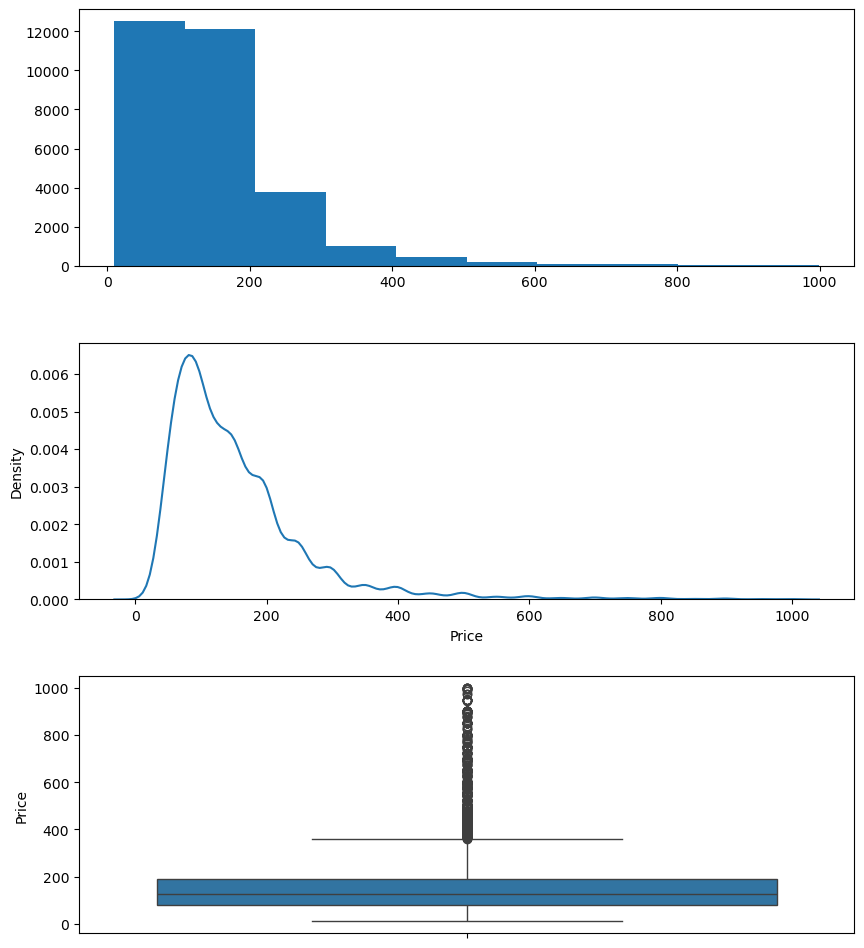

In [106]:
fig, ax = plt.subplots(3,1, figsize=(10,12))

ax[0].hist(airbnb_df["Price"])
sns.kdeplot(airbnb_df["Price"], ax=ax[1])
sns.boxplot(airbnb_df["Price"], ax=ax[2])

plt.subplots_adjust(hspace=0.3)

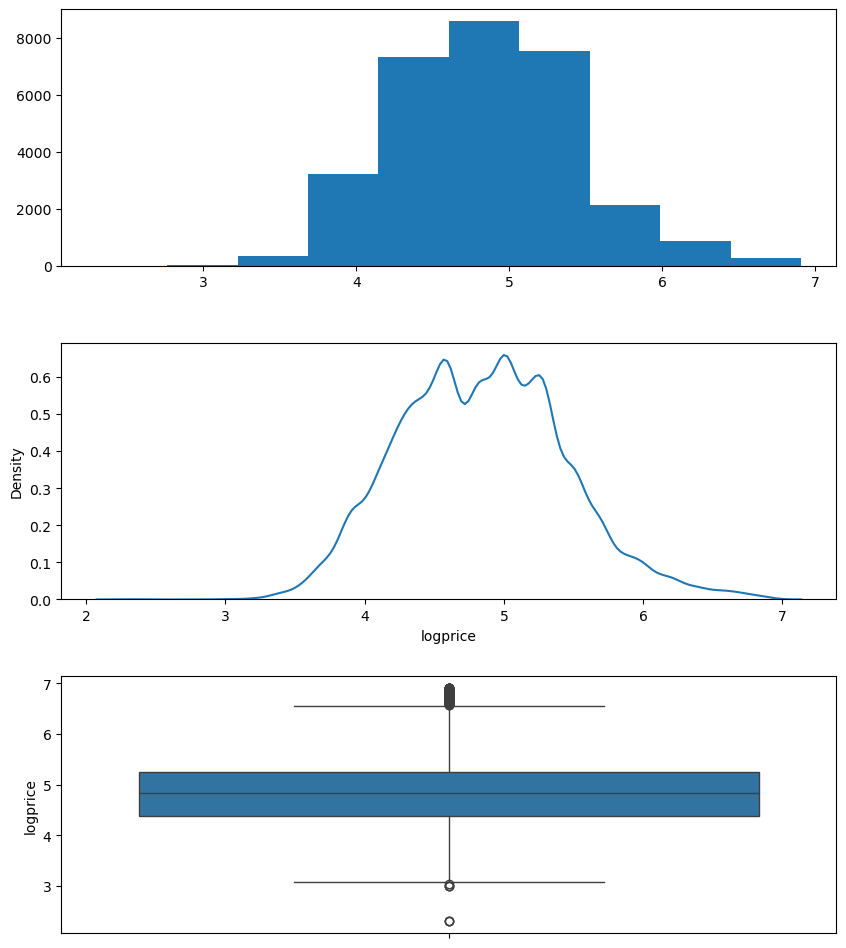

In [107]:
fig, ax = plt.subplots(3,1, figsize=(10,12))
airbnb_df["logprice"] = np.log(airbnb_df["Price"])
ax[0].hist(airbnb_df["logprice"])
sns.kdeplot(airbnb_df["logprice"], ax=ax[1])
sns.boxplot(airbnb_df["logprice"], ax=ax[2])

plt.subplots_adjust(hspace=0.3)

### dimensions

In [66]:
airbnb_df.shape

(30478, 13)

In [68]:
airbnb_df.columns

Index(['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating'],
      dtype='object')

In [67]:
airbnb_df.head(2)

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN


### cross-tab

In [70]:
pd.crosstab(airbnb_df["Room Type"], airbnb_df["Property Type"])

Property Type,Apartment,Bed & Breakfast,Boat,Bungalow,Cabin,Camper/RV,Castle,Chalet,Condominium,Dorm,House,Hut,Lighthouse,Loft,Other,Tent,Townhouse,Treehouse,Villa
Room Type,,,,,,,,,,,,,,,,,,,
Entire home/apt,15669,13,7,4,1,6,0,0,72,4,752,0,1,392,14,0,83,0,4
Private room,10748,155,1,0,1,1,1,1,22,16,1258,2,0,312,29,4,52,1,4
Shared room,685,12,0,0,0,0,0,0,0,11,80,0,0,49,4,0,1,3,0


**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.